codigo suministrado por el profesor


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class KMeans:
    """
    Algoritmo de clustering K-Means

    Parametros:
        k (int): Número de clusters a encontrar (por defecto 3)
        max_iter (int): Número maximo de iteraciones (por defecto 100)
        centroids (numpy.ndarray): Cordenadas iniciales del centroides (por defecto ninguna)
    """
    def __init__(self, k=3, max_iter=100):
        """
        Constructor de objetos kMeans

        Parametros:
            k (int): Número de cluster
            max_iter (int): Número maximo de iteraciones
        """
        self.k = k
        self.max_iter = max_iter
        self.centroids = None

    def distancia_euclideana(self, p1, p2):
        """
        Calcula la distancia Euclideana entre dos puntos.

        Parametros:
            point1 (numpy.ndarray): Primer punto
            point2 (numpy.ndarray): Segundo punto

        Returns:
            float: La distancia euclideana entre los dos puntos
        """
        return np.sqrt(np.sum((p1 - p2)**2))


    def calcular_centroides(self, points, labels):
        """
        Calcula los centroides de la nube de puntos dada por la asignación en la variable labels

        Parametros:
            points (numpy.ndarray): Nube de puntos
            labels (numpy.ndarray): Cluster asignado para cada punto

        Returns:
            numpy.ndarray: Centroides de cada cluster
        """

        centroids = np.zeros((self.k, points.shape[1]))
        for i in range(self.k):
            cluster_points = points[labels == i]
            if len(cluster_points) > 0:
              centroids[i] = np.mean(cluster_points, axis=0)
        return centroids

    def run(self, points, tipo_distance='euclidean'):
        """
        Ejecuta un algoritmo K-Means dado la nube de puntos recibida como parametro

        Parametros:
            points (numpy.ndarray): Nube de puntos
            tipo_distance (str): Tipo de distancia a utilizar ('euclidean', 'manhattan', or 'mahalanobis'). Por defecto  'euclidean'.

        Returns:
            numpy.ndarray: El cluster asignado a cada grupo
        """

        indices = np.random.choice(points.shape[0], self.k, replace=False)
        self.centroids = points[indices]

        for _ in range(self.max_iter):
            labels = np.zeros(points.shape[0], dtype=int)
            for i, point in enumerate(points):
                if tipo_distance == 'euclidean':
                    distances = [self.distancia_euclideana(point, centroid) for centroid in self.centroids]
                else:
                    raise ValueError("Tipo de distancia no disponible")
                labels[i] = np.argmin(distances)

            new_centroids = self.calcular_centroides(points, labels)

            if np.array_equal(self.centroids, new_centroids):
                break

            self.centroids = new_centroids


        return labels

**PUNTO #1**:
1000 MUESTRAS, 2D,K=3, DISTANCIA EUCLIDIANA, MAX ITERACIONES = 10, 100, 1000, 10000



In [4]:
def dibujar2D (points, centroids, labels):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(points[:, 0], points[:, 1], c='blue', label='Puntos')
    plt.title('Antes de kmeans')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(points[:, 0], points[:, 1], c=labels, cmap='viridis', label='Puntos')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='*', s=200, label='Centroides finales')
    plt.title('Despues de kmeans')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    plt.tight_layout()
    plt.show()

SI DESEA VER DETALLADAMENTE LAS MUESTRAS Y EL CAMBIO DE ITERACIONES MODIFIQUE EL VALOR QUE ESTA EN LA VARIABLE POINSTS Y MAX_ITER


In [16]:

# Ejemplo de uso (datos con 2 caracteristicas) usando distancia de euclidean
points= np.random.rand(10000  , 2)
kmeans = KMeans(k=3, max_iter= 10000)
labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)

[0 0 2 ... 2 1 1]
[[0.3242431  0.2289563 ]
 [0.31093713 0.76635721]
 [0.80270329 0.50840689]]


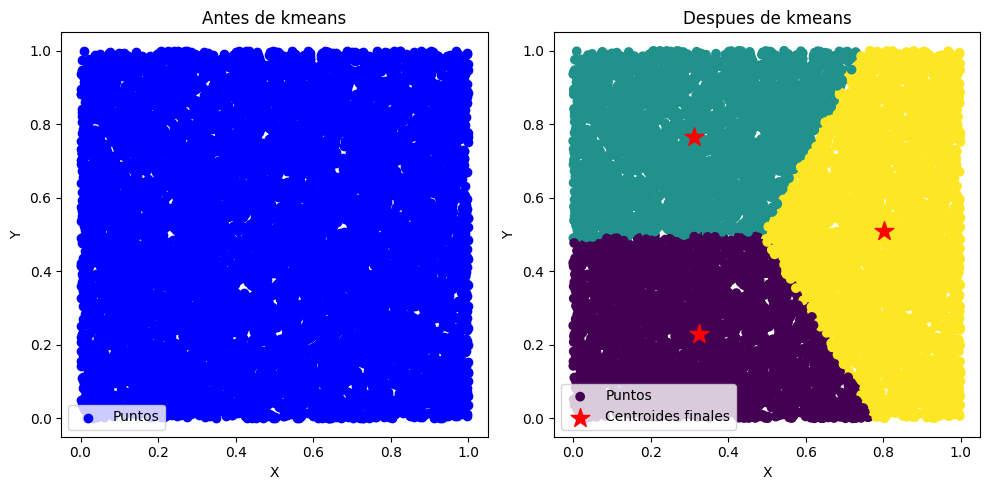

In [17]:
dibujar2D(points, kmeans.centroids, labels)

**PUNTO #2**
1000 MUESTRAS, 3D,  K=3 DISTANCIA EUCLIDIANA, MAX_ITERACIONES= 10, 100, 1000, 10000


In [20]:
def dibujar3D (points, centroids, labels):
    fig = plt.figure(figsize=(10, 5))
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(points[:, 0], points[:, 1], points[:, 2], c='blue', label='Puntos')
    ax1.set_title('Antes de kmeans')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.legend()


    # Plot the points and final centroids
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(points[:, 0], points[:, 1], points[:, 2], c=labels, cmap='viridis', label='Puntos')
    ax2.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='*', s=200, label='Centroides finales')
    ax2.set_title('Despues de kmeans')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    ax2.legend()

    plt.tight_layout()
    plt.show()

SI DESEA VER DETALLADAMENTE LAS MUESTRAS Y EL CAMBIO DE ITERACIONES MODIFIQUE EL VALOR QUE ESTA EN LA VARIABLE POINSTS Y MAX_ITER

In [26]:
# Ejemplo de uso (datos con 3 caracteristicas) usando distancia de euclidean
points= np.random.rand(10000, 3)
kmeans = KMeans(k=3, max_iter= 10000)
labels = kmeans.run(points, tipo_distance="euclidean")
print(labels)
print(kmeans.centroids)

[1 2 0 ... 1 2 1]
[[0.29832849 0.52004365 0.24227067]
 [0.33101788 0.49267373 0.77873624]
 [0.80239495 0.47987314 0.48384736]]


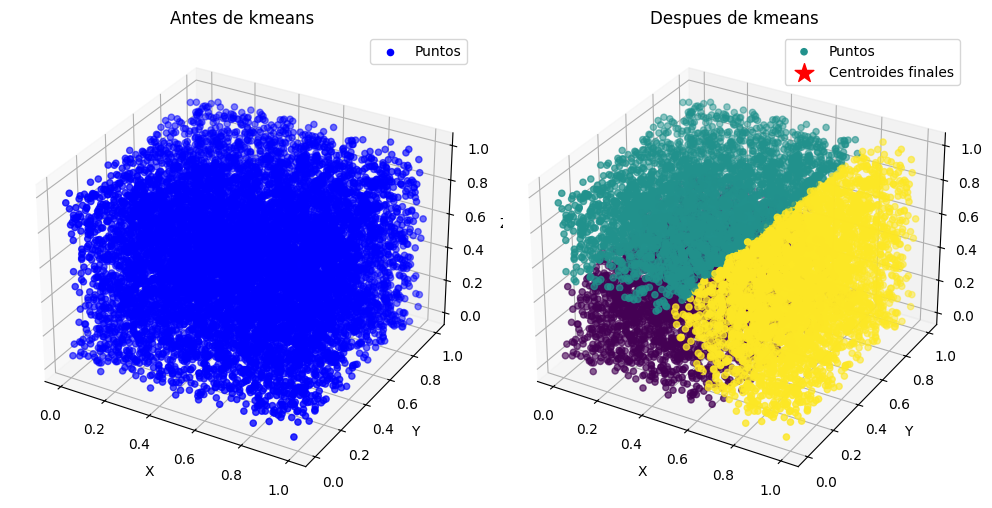

In [27]:
dibujar3D(points, kmeans.centroids, labels)

**PUNTO #3**
1000 MUESTRAS, 10D,  K=3 DISTANCIA EUCLIDIANA, MAX_ITERACIONES= 10, 100, 1000, 10000

SI DESEA VER DETALLADAMENTE LAS MUESTRAS Y EL CAMBIO DE ITERACIONES MODIFIQUE EL VALOR QUE ESTA EN LA VARIABLE POINSTS Y MAX_ITER


In [29]:
# Ejemplo de uso (datos con 10 caracteristicas) usando distancia de euclidean
points= np.random.rand(10, 10)
kmeans = KMeans(k=3, max_iter= 10000)
labels = kmeans.run(points, tipo_distance="euclidean")
print(labels)
print(kmeans.centroids)

[1 2 2 1 2 2 1 0 0 0]
[[0.66416212 0.7931489  0.63056106 0.43204432 0.52985187 0.28906795
  0.76196204 0.25643537 0.48862519 0.4754988 ]
 [0.38188105 0.35060861 0.47414764 0.6223223  0.23095006 0.40696808
  0.37667827 0.22160388 0.60235289 0.3018301 ]
 [0.30936297 0.47244397 0.52521134 0.77580941 0.42453977 0.44413819
  0.41994818 0.80172075 0.21889352 0.40944003]]



**PUNTO #4**
1000 MUESTRAS, 100D,  K=3 DISTANCIA EUCLIDIANA, MAX_ITERACIONES= 10, 100, 1000, 10000

SI DESEA VER DETALLADAMENTE LAS MUESTRAS Y EL CAMBIO DE ITERACIONES MODIFIQUE EL VALOR QUE ESTA EN LA VARIABLE POINSTS Y MAX_ITER

In [31]:
# Ejemplo de uso (datos con 100 caracteristicas) usando distancia de euclidean
points= np.random.rand(10, 100)
kmeans = KMeans(k=3, max_iter= 10)
labels = kmeans.run(points, tipo_distance="euclidean")
print(labels)
print(kmeans.centroids)

[1 0 0 1 0 2 1 2 0 0]
[[0.59323155 0.52750617 0.55650296 0.58464256 0.5390172  0.62928394
  0.40063092 0.26562792 0.64149022 0.58917221 0.60513476 0.31256732
  0.65795063 0.22536074 0.42880742 0.56287226 0.37988087 0.44995222
  0.68088634 0.39903275 0.39911093 0.67032932 0.69235737 0.45051024
  0.37568536 0.33356354 0.50283537 0.71100391 0.34659431 0.54355184
  0.35286076 0.53483001 0.44452632 0.38315529 0.25617475 0.29619414
  0.4226703  0.67791125 0.60902664 0.47169225 0.59577819 0.32031441
  0.75805486 0.60055626 0.4810418  0.33246642 0.80617101 0.36838104
  0.65082112 0.63035826 0.56207465 0.4638802  0.81361399 0.43834651
  0.63535493 0.3177117  0.54865018 0.43575819 0.47774991 0.51030328
  0.44299843 0.33348487 0.51324888 0.64253883 0.41094765 0.33098478
  0.57875675 0.55301671 0.33418701 0.65396406 0.53199366 0.21369756
  0.31018441 0.55397891 0.48562292 0.72545826 0.71499452 0.54775454
  0.41696368 0.46796534 0.49529585 0.39007093 0.39819589 0.3297251
  0.3322349  0.26747084 0.6

**PUNTO #5**
1000 MUESTRAS, 3D,  K=2,3,5,10 DISTANCIA EUCLIDIANA, MAX_ITERACIONES= 10, 100, 1000, 10000


SI DESEA VER DETALLADAMENTE LAS MUESTRAS CONFORMACION DE GRUPOS Y EL CAMBIO DE ITERACIONES MODIFIQUE EL VALOR QUE ESTA EN LA VARIABLE POINSTS, k Y MAX_ITER


In [42]:
# Ejemplo de uso (datos con 3 caracteristicas) usando distancia de euclidean
points= np.random.rand(10000, 3)
kmeans = KMeans(k=10, max_iter= 1000)
labels = kmeans.run(points, tipo_distance="euclidean")
print(labels)
print(kmeans.centroids)

[2 4 2 ... 0 4 7]
[[0.58018172 0.51115085 0.50159699]
 [0.77003562 0.22689349 0.23709906]
 [0.26114459 0.84550778 0.2732625 ]
 [0.76881985 0.24410943 0.76771702]
 [0.23893485 0.73605196 0.78778149]
 [0.27585147 0.15698802 0.25162324]
 [0.75243637 0.77816011 0.76087708]
 [0.76065587 0.75960542 0.2171949 ]
 [0.24959109 0.22294425 0.77137733]
 [0.20595622 0.49747456 0.23537089]]


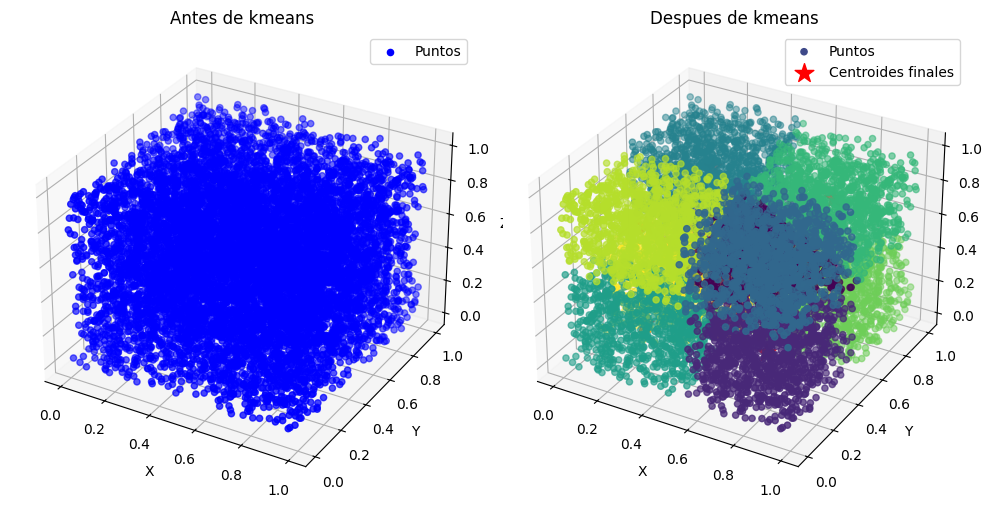

In [43]:
dibujar3D(points, kmeans.centroids, labels)

**PUNTO #6**
1000 MUESTRAS, 2D,  K=5 DISTANCIA EUCLIDIANA,MANHATTAN, MAHALANOBIS, MAX_ITERACIONES= 1000

In [ ]:
# Ejemplo de uso (datos con 2 caracteristicas) usando distancia de euclidean
points= np.random.rand(1000, 2)
kmeans = KMeans(k=5, max_iter= 1000)
labels = kmeans.run(points, tipo_distance="euclidean")
print("\nEuclidean Distance:")
print(labels)
print(kmeans.centroids)


Euclidean Distance:
[2 2 2 4 1 0 2 0 2 3 1 2 1 4 4 0 2 4 2 3 4 3 3 4 3 2 0 2 2 3 0 3 4 0 1 1 0
 2 1 0 4 2 4 2 4 0 0 3 4 3 1 0 3 2 1 3 0 1 0 1 0 1 1 0 3 1 0 4 0 3 3 1 0 0
 3 1 1 2 4 4 1 3 3 2 1 4 3 1 4 3 3 1 4 3 3 4 0 2 0 3 1 0 0 4 2 3 3 2 4 0 0
 0 4 1 0 2 2 2 2 4 3 1 4 2 4 1 1 4 4 0 2 2 4 0 1 1 4 3 4 2 1 1 3 3 1 2 0 0
 4 0 1 3 3 0 1 0 3 3 4 2 3 4 1 2 1 4 1 3 4 1 2 0 2 1 1 0 1 3 2 0 2 0 3 0 4
 2 0 2 0 3 4 0 2 4 1 1 4 3 2 2 1 2 2 1 1 4 2 1 3 3 1 3 3 2 1 3 3 3 3 3 1 4
 4 3 1 4 1 3 0 3 1 4 2 2 2 3 0 3 1 0 2 4 2 3 3 0 0 2 0 3 4 3 2 4 1 4 0 2 2
 2 1 1 1 2 2 3 3 0 2 0 4 2 4 2 2 1 3 3 4 0 1 3 3 3 3 2 3 2 0 0 2 1 3 1 4 3
 3 0 2 1 2 2 2 1 0 0 2 4 0 1 2 2 0 3 3 3 2 0 1 0 2 2 3 2 1 2 3 1 2 2 3 3 1
 1 0 4 3 3 1 2 4 1 0 1 2 3 3 0 4 1 3 4 0 3 0 2 2 1 4 0 4 4 0 3 2 1 1 0 0 1
 0 4 0 0 3 2 4 3 3 3 1 1 4 0 2 3 2 3 0 4 4 4 2 3 1 4 1 3 1 2 3 3 2 1 2 3 0
 2 0 0 0 4 4 4 3 0 3 3 0 3 2 0 0 1 4 4 3 1 2 2 1 2 4 2 1 1 0 1 1 0 1 3 2 3
 0 2 3 3 3 3 1 3 1 1 2 3 1 2 3 3 1 1 2 1 3 3 2 2 2 1 0 1 3 2 1 4 2 1 2 2 1
 0 2

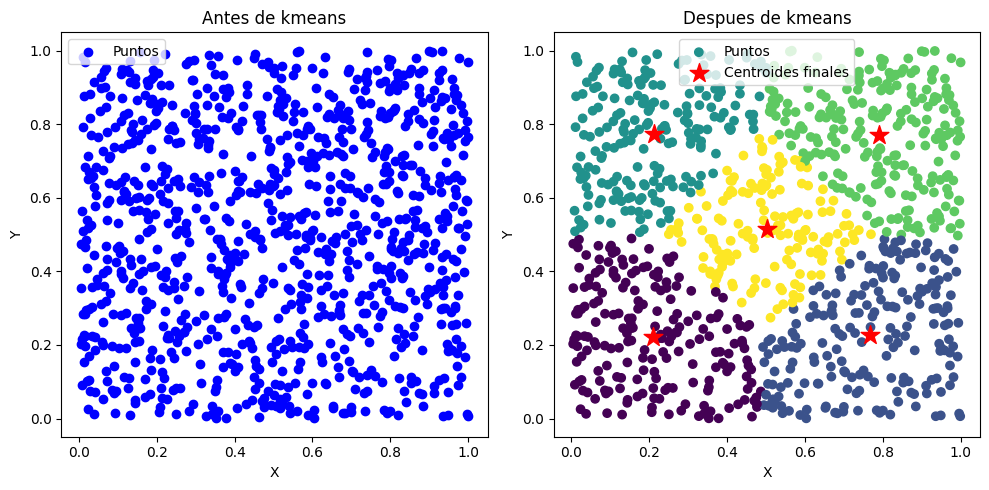

In [ ]:
dibujar2D(points, kmeans.centroids, labels)


SI DESEA VER DETALLADAMENTE LAS MUESTRAS Y EL CAMBIO DE ITERACIONES MODIFIQUE EL VALOR QUE ESTA EN LA VARIABLE POINSTS Y MAX_ITER


**PUNTO #7**
  DETERMINE POR CADA EXPERIMENTO, CUANTAS ITERACIONES SON NECESARIAS PARA CONVERGENCIA (centroides actuales son igual que centroides anteriores)

In [ ]:
def kmeans_convergence(X, k, max_iter=100):
    # X: datos de entrada
    # k: número de centroides/clústeres
    # max_iter: número máximo de iteraciones para evitar bucles infinitos

    # Inicializar los centroides de forma aleatoria
    centroids = initialize_centroids(X, k)
    prev_centroids = None
    iteration = 0

    while iteration < max_iter:
        iteration += 1

        # Paso 1: Asignar puntos al centroide más cercano
        clusters = assign_points_to_centroids(X, centroids)

        # Paso 2: Recalcular los centroides
        centroids = calculate_new_centroids(X, clusters, k)

        # Paso 3: Comprobar si los centroides no han cambiado
        if prev_centroids is not None and np.array_equal(centroids, prev_centroids):
            print(f'Convergencia alcanzada en la iteración {iteration}')
            return iteration  # Retorna el número de iteraciones hasta la convergencia

        prev_centroids = centroids

    print(f'Alcanzado el número máximo de iteraciones ({max_iter}) sin convergencia')
    return iteration  # En caso de que no converja antes del número máximo de iteraciones

